# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Tahsin Ahmad

Datum: 12.11.23

Gruppe: 29

## Forschungsfrage
Wie hoch wird die Mischtemperatur sein, wenn ich zwei identische Flüssigkeiten derselben Masse miteinander mische?

## Versuchsaufbau und Durchführung
Das warme Wasser befindet sich in der roten Tasse und seine Temperatur wird von Sensor_1 gemessen, das kalte Wasser befindet sich in der schwarzen Tasse und seine Temperatur wird von Sensor_2 gemessen. Nach einiger Zeit werden Wasser und Sensor aus der roten Tasse entnommen und in den schwarzen Tasse hinzugegeben.

<img src="figures/kapaz.jpg" width="800">

## Versuchsauswertung

In [10]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json
# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")

### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [18]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
hdf5_file_path = "data/heat_capacity/heat_capacity.h5"
# DONE #

In [19]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
import h5py
# Opening the HDF5 file in read mode
with h5py.File(hdf5_file_path, 'r') as file:
    # Reading metadata attributes from the HDF5 file
    metadata = {
        'created': file.attrs.get('created'),
        'experiment': file.attrs.get('experiment'),
        'group_number': file.attrs.get('group_number'),
        'authors': file.attrs.get('authors'),
    }

    # Printing metadata
    print("Metadata:")
    print(metadata)

    # Reading data from the HD5
    raw_data_group = file['RawData']
    sensors = {}

    for sensor_uuid, sensor_group in raw_data_group.items():
        temperature = list(sensor_group['temperature'])
        timestamp = list(sensor_group['timestamp'])
        sensor_metadata = {
            'name': sensor_group.attrs.get('name'),
            'serial': sensor_group.attrs.get('serial'),
        }

        sensors[sensor_uuid] = {
            'temperature': temperature,
            'timestamp': timestamp,
            'metadata': sensor_metadata,
        }

    # Printing experimental data
    print("\nExperimental Data:")
    print(sensors)

# DONE #

Metadata:
{'created': '2023-11-11', 'experiment': 'Calorimetry', 'group_number': 29, 'authors': 'Tahsin'}

Experimental Data:
{'sensor_1': {'temperature': [59.875, 59.8125, 59.75, 59.625, 59.5, 59.4375, 59.375, 59.25, 59.25, 59.0625, 58.9375, 58.8125, 56.125, 45.9375, 43.5, 41.6875, 40.125, 38.8125, 37.6875, 36.8125, 36.25, 36.9375, 37.0, 36.9375, 36.75, 36.625, 36.625, 36.3125, 36.1875, 36.0625, 36.0625, 35.9375, 35.875, 35.8125, 35.6875, 35.6875, 35.625, 35.5625, 35.5, 35.4375, 35.375, 35.3125], 'timestamp': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41], 'metadata': {'name': 'Red cup sensor', 'serial': '3ce104571a79'}}, 'sensor_2': {'temperature': [19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5625, 19.5625, 19.5625, 25.5, 29.875, 32.125, 33.375, 34.125, 34.625, 35.0, 35.5625, 35.8125, 35.9375, 36.0, 35.9375, 35.875, 35.875, 35.8125, 35.8125, 35.75, 35.687

#### (ii) Daten ploten

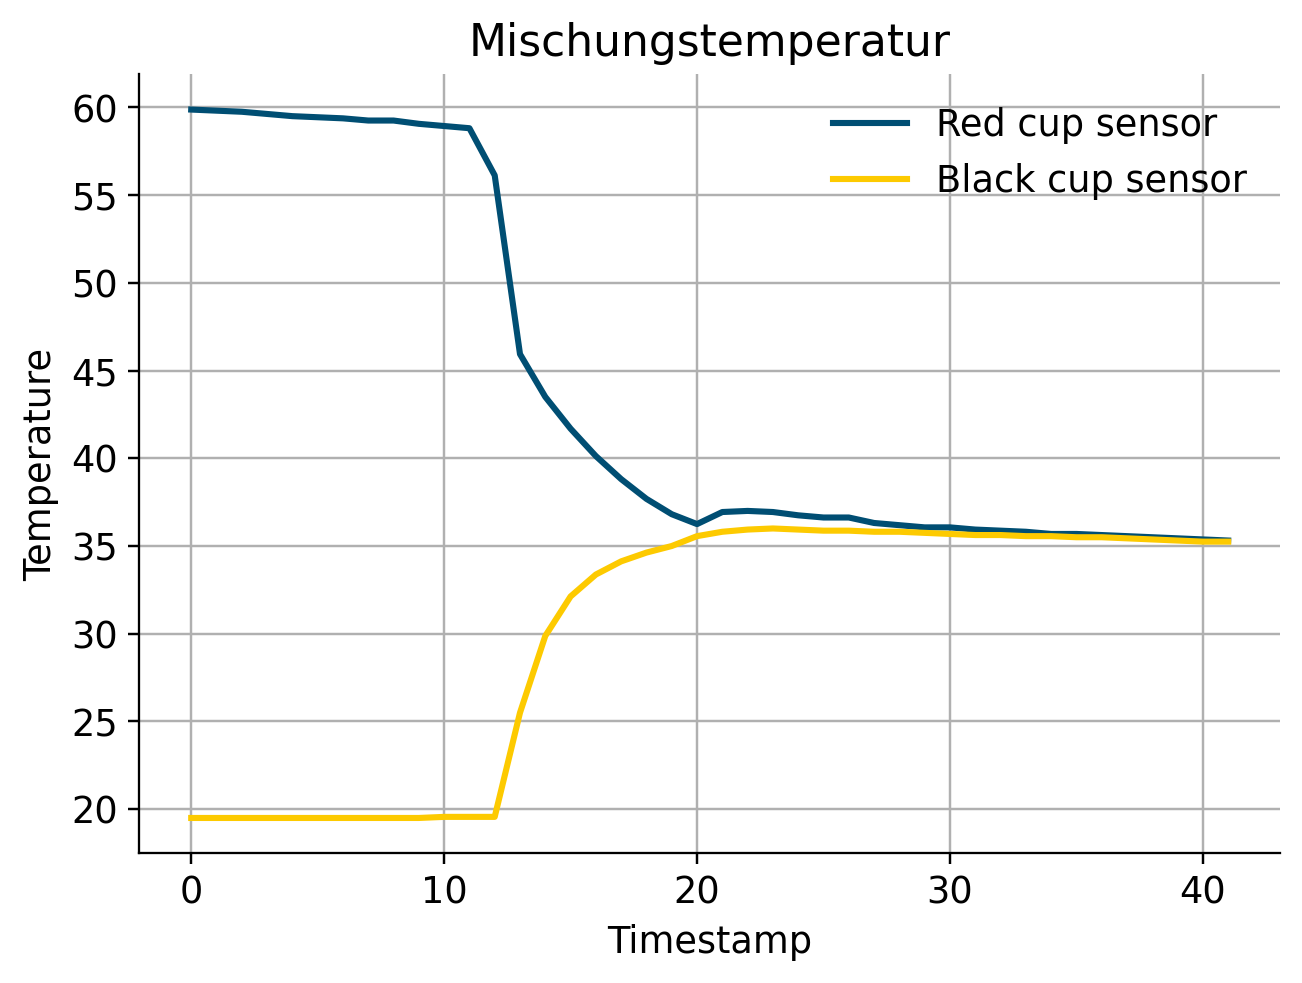

In [20]:
# TODO: Use the temperature and time data for plotting
# Plotting the data for each sensor
for sensor_uuid, data in sensors.items():
    plt.plot(data['timestamp'], data['temperature'], label=data['metadata']['name'],linewidth=2)

# Adding labels and  legend
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Mischungstemperatur')
plt.legend()
plt.grid(True)

# Showing the plot
plt.show()
#Sensor 1 is in red cup
#Sensor 2 in black cup 

# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [21]:
# Heat capacity of Water
water_heat_capa = 4.18#J/g°C.
# TODO: Read mass from the metadata of the experiment.
import json
json_file_path = 'data/heat_capacity/probe_heat_capacity_1ee8146f-6707-6efd-a19b-978c82bae681.json'
# Reading the JSON data from the file
with open(json_file_path, 'r') as json_file:
    metadata = json.load(json_file)

# Reading mass from the probe section
red_cup_mass_info = metadata.get("probe", {}).get("Red cup", "")
black_cup_mass_info = metadata.get("probe", {}).get("Black cup", "")

#getting mass 
red_cup_mass = int(''.join(filter(str.isdigit, red_cup_mass_info)))
black_cup_mass = int(''.join(filter(str.isdigit, black_cup_mass_info)))
m_add = red_cup_mass
m_cup=black_cup_mass

#for water mililiters=grams>>correct unit for mass 

# Printing the extracted mass information
print("Red Cup Mass:", red_cup_mass, "grams")
print("Black Cup Mass:", black_cup_mass, "grams")
print ('m_add=',m_add,'g')
print ('m_cup=',m_cup,'g')
# DONE #

Red Cup Mass: 150 grams
Black Cup Mass: 150 grams
m_add= 150 g
m_cup= 150 g


#### (iV) Anfangs- und Endwert der Temperatur

In [25]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
# Opening the HDF5 file in read mode
with h5py.File(hdf5_file_path, 'r') as file:
    # Reading experimental data from HD5
    raw_data_group = file['RawData']
    
    #variables for first and last temperature values for each sensor
    T2 = raw_data_group['sensor_1']['temperature'][0]
    TM_1 = raw_data_group['sensor_1']['temperature'][-1]

    T1 = raw_data_group['sensor_2']['temperature'][0]
    TM_2 = raw_data_group['sensor_2']['temperature'][-1]

# Printing the extracted values
print("T2=",T2,'Celsius')
print("TM_1=",TM_1,'Celsius')

print("T1=",T1,'Celsius')
print("TM_2=", TM_2,'Celsius')
#getting mean from both sensor
TM = (TM_1+TM_2)/2
print ("Your final TM is =",TM,'Celsius' )

# DONE #

T2= 59.875 Celsius
TM_1= 35.3125 Celsius
T1= 19.5 Celsius
TM_2= 35.25 Celsius
Your final TM is = 35.28125 Celsius


#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [27]:
# TODO: Calculate heat capacity of the calorimeter
# Given variables
m_add = 150  # Mass of added fluid in grams
m_cup = 150  # Mass of fluid already present in the cup in grams
T2 = 59.875  # Temperature of red cup in Celsius
T1 = 19.5  # Temperature of black cup in Celsius
TM = 35.28125  # Temperature TM in Celsius >average from both sensors
cw = 4.18  # Specific heat capacity of water in J/(g°C)

# Calculating the heat capacity (C)
C = ((m_add * cw * (T2 - TM)) / (TM - T1)) - m_cup * cw
# DONE #

#### (Vi) Ergebnis

In [28]:
# TODO: Print result
print("Heat Capacity (C)=", C, "J/°C")
# DONE #

Heat Capacity (C)= 350.12673267326727 J/°C


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Die Wärmekapazität beträgt 350,12673267326727 J/°C. Die Mischungstemperatur deutet auf verluste während des Mischungsvorgangs.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Bevor ich die Mischtemperatur berechnet habe, habe ich kurz geschätzt, wie hoch die Mischtemperatur sein würde.
ohne groß darüber nachzudenken. Ich habe die Mischungstemperatur auf etwa 40 Grad Celsius geschätzt.
Als ich die tatsächliche Temperatur sah, wurde mir klar, dass der Unterschied auf Verluste zurückzuführen war
Nach dem Mischen war der rote Becher noch warm und die Flüssigkeit kühlte beim Mischen ab. Insgesamt hat mir das Experiment Spaß gemacht und ich habe jetzt eine bessere Vorstellung davon, wie wissenschaftliche Experimente funktionieren.